<a href="https://colab.research.google.com/github/lokeshkumarn/Notebooks/blob/master/BankTermDeposit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd

#Visualizations
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

#Modeling
import sklearn

Load the Data

In [2]:
data = pd.read_excel('Bank Data for case study assignment.xlsx')

In [3]:
data.head()

,age,job,marital status,education,credit default?,housing loan?,Personal loan,y
0,30,unemployed,married,primary,no,no,no,no
1,33,services,married,secondary,no,yes,yes,no
2,35,management,single,tertiary,no,yes,no,no
3,30,management,married,tertiary,no,yes,yes,no
4,59,blue-collar,married,secondary,no,yes,no,no


Exploratory Data Analysis and Statistical Analysis

In [4]:
data.columns

Index(['age', 'job', 'marital status ', 'education', 'credit default?',
       'housing loan?', 'Personal loan', 'y'],
      dtype='object')

Column Marital Status is having extra space in the end, just rename it without space in the end
credit default? and housing loan?, just rename without "?" and Personal loan is rename as small case.

In [5]:
data.rename(columns={'marital status ':'marital status',
                     'credit default?':'credit default',
                     'housing loan?':'housing loan',
                     'Personal loan':'personal loan'
                    },inplace=True)

In [6]:
#To find the missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1019 non-null object
marital status    1020 non-null object
education         1020 non-null object
credit default    1020 non-null object
housing loan      1019 non-null object
personal loan     1019 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


Total 1021 records in that Marital Status, Education, Credit Default having 1 missing data and Job,Housing Loan, personal loan has two missing data

First fill the missing  value for the job

In [7]:
data[data['job'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
79,40,NaN,married,secondary,no,yes,no,no
1004,42,NaN,single,secondary,no,yes,yes,yes


Taking the first record from above and looking for data whose attribute values are similar to that of the missing value and decide how to replace the missing value

In [8]:
data[(data['age']== 40) & 
     (data['marital status'] =='married') & 
     (data['education'] =='secondary') & 
     (data['credit default'] =='no') & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='no') & 
     (data['y'] =='no') & 
     (data['job'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y
270,40,services,married,secondary,no,yes,no,no
482,40,technician,married,secondary,no,yes,no,no
597,40,management,married,secondary,no,yes,no,no
671,40,technician,married,secondary,no,yes,no,no
684,40,services,married,secondary,no,yes,no,no
710,40,technician,married,secondary,no,yes,no,no
960,40,technician,married,secondary,no,yes,no,no
1012,40,blue-collar,married,secondary,no,yes,no,no


Taking the Mode and imputing the missing value for job 

In [9]:
data[(data['age']== 40) & 
     (data['marital status'] =='married') & 
     (data['education'] =='secondary')& 
     (data['credit default'] =='no') & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='no') & 
     (data['job'].isnull()==False)]['job'].mode()

0    technician
dtype: object

In [10]:
data[(data['age']== 40) & 
     (data['marital status'] =='married') & 
     (data['education'] =='secondary') & 
     (data['credit default'] =='no') &
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='no')& 
     (data['job'].isnull()==True)]

,age,job,marital status,education,credit default,housing loan,personal loan,y
79,40,NaN,married,secondary,no,yes,no,no


imputing the new value for job using the mod value of job whose attributes had similar values as that of the missing values

In [11]:
data.loc[(data['age']== 40) & 
         (data['marital status'] =='married') & 
         (data['education'] =='secondary')    & 
         (data['credit default'] =='no') & 
         (data['housing loan'] =='yes') & 
         (data['personal loan'] =='no')
    & (data['job'].isnull()==True),'job']=\
data[(data['age']== 40) & 
     (data['marital status'] =='married') & 
     (data['education'] =='secondary')    & 
     (data['credit default'] =='no') & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='no')    & 
     (data['job'].isnull()==False)]['job'].mode()[0]

In [12]:
data[data['job'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
1004,42,NaN,single,secondary,no,yes,yes,yes


Data imputed, from the above it is clear that only one is missing right now and do the similar kind of operation for above record also

In [13]:
data[(data['age']== 42) & 
     (data['marital status'] =='single') & 
     (data['education'] =='secondary') & 
     (data['credit default'] =='no') & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='yes') & 
     (data['y'] =='yes') & 
     (data['job'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y


No data available for similar values.So look in broader scope

Remove the Marital Status and check

In [14]:
data[(data['age']== 42) & 
     (data['education'] =='secondary') & 
     (data['credit default'] =='no') & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='yes') & 
     (data['y'] =='yes') & 
     (data['job'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y


Remove Education also and check

In [15]:
data[(data['age']== 42) & 
     (data['credit default'] =='no') & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='yes') & 
     (data['y'] =='yes') & 
     (data['job'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y


Remove credit default

In [16]:
data[(data['age']== 42) & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='yes') & 
     (data['y'] =='yes') & 
     (data['job'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y


Remove housing loan

In [17]:
data[(data['age']== 42) &  
     (data['personal loan'] =='yes') & 
     (data['y'] =='yes') & 
     (data['job'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y


Remove the personal loan also from condition

In [18]:
data[(data['age']== 42) &  
     (data['y'] =='yes') & 
     (data['job'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y
215,42,management,married,tertiary,no,yes,no,yes


Finally we got that the missing value based on the result from above. So lets impute the job value to the missing value

In [19]:
data[(data['age']== 42) &  
     (data['y'] =='yes') & 
     (data['job'].isnull()==False)]['job'].mode()[0]

'management'

In [20]:
data[(data['age']== 42) & 
     (data['marital status'] =='single') & 
     (data['education'] =='secondary') & 
     (data['credit default'] =='no') & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='yes') & 
     (data['y'] =='yes') & 
     (data['job'].isnull()==True)]

,age,job,marital status,education,credit default,housing loan,personal loan,y
1004,42,NaN,single,secondary,no,yes,yes,yes


In [21]:
data.loc[(data['age']== 42) & 
     (data['marital status'] =='single') & 
     (data['education'] =='secondary') & 
     (data['credit default'] =='no') & 
     (data['housing loan'] =='yes') & 
     (data['personal loan'] =='yes') & 
     (data['y'] =='yes') & 
     (data['job'].isnull()==True),'job']=\
data[(data['age']== 42) &  
     (data['y'] =='yes') & 
     (data['job'].isnull()==False)
    ]['job'].mode()[0]

Lets check the whether the values are imputed to the job

In [22]:
data[data['job'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1021 non-null object
marital status    1020 non-null object
education         1020 non-null object
credit default    1020 non-null object
housing loan      1019 non-null object
personal loan     1019 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


No empty values in job, so lets move on to the next attribute housing loan

In [24]:
data[data['housing loan'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
109,27,housemaid,married,primary,no,NaN,NaN,no
1016,33,services,married,secondary,no,NaN,no,no


as the first row has missing values in personal loan as well, so lets focus on the second row

In [25]:
data[(data['age']==33) &
    (data['job']=='services') &
    (data['marital status']=='married') &
    (data['education']=='secondary') &
    (data['credit default']=='no') &
    (data['housing loan'].isnull()==False) &
    (data['personal loan']=='no') &
    (data['y']=='no')]

,age,job,marital status,education,credit default,housing loan,personal loan,y
1007,33,services,married,secondary,no,yes,no,no


lets impute the value based on the above result

In [26]:
data[(data['age']==33) &
    (data['job']=='services') &
    (data['marital status']=='married') &
    (data['education']=='secondary') &
    (data['credit default']=='no') &
    (data['housing loan'].isnull()==False) &
    (data['personal loan']=='no') &
    (data['y']=='no')]['job'].mode()[0]

'services'

In [27]:
data.loc[(data['age']==33) &
    (data['job']=='services') &
    (data['marital status']=='married') &
    (data['education']=='secondary') &
    (data['credit default']=='no') &
    (data['housing loan'].isnull()) &
    (data['personal loan']=='no') &
    (data['y']=='no'),'housing loan']=\
data[(data['age']==33) &
    (data['job']=='services') &
    (data['marital status']=='married') &
    (data['education']=='secondary') &
    (data['credit default']=='no') &
    (data['housing loan'].isnull()==False) &
    (data['personal loan']=='no') &
    (data['y']=='no')]['job'].mode()[0]

In [28]:
data[data['housing loan'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
109,27,housemaid,married,primary,no,NaN,NaN,no


In [29]:
data[(data['age']==27) &
    (data['job']=='housemaid') &
    (data['marital status']=='married') &
    (data['education']=='primary') &
    (data['credit default']=='no') &
    (data['housing loan'].isnull()==False) &
    (data['y']=='no')]

,age,job,marital status,education,credit default,housing loan,personal loan,y


since we dont have data for matching attribute values , lets check in that age we have data

In [30]:
data[data['age']==27].head()

,age,job,marital status,education,credit default,housing loan,personal loan,y
80,27,admin.,divorced,secondary,no,yes,no,yes
92,27,services,single,secondary,no,yes,no,yes
109,27,housemaid,married,primary,no,NaN,NaN,no
134,27,technician,single,secondary,no,yes,no,no
158,27,self-employed,single,secondary,no,no,no,no


as we have many samples, lets add another condition that do we have housemaid more than one that is apart the one which has missing value

In [31]:
data[(data['age']==27) & (data['job']=='housemaid') & (data['housing loan'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y


As the data is not available, lets put a range to the age as 25-30 

In [32]:
data[(data['age'] >= 25) & (data['age'] <= 30) & (data['job']=='housemaid') & (data['housing loan'].isnull()==False)]

,age,job,marital status,education,credit default,housing loan,personal loan,y
24,26,housemaid,married,tertiary,no,no,no,no
830,30,housemaid,single,tertiary,no,no,no,no
854,26,housemaid,married,secondary,no,yes,no,no


as the data is not giving clear idea to decide on the value, so lets try with other attributes

In [33]:
data[(data['age'] >= 25) & (data['age'] <=30) &
     (data['education']=='primary') & 
     (data['marital status']=='married') &
     (data['credit default']=='no') &
     (data['y']=='no') &
     (data['housing loan'].isnull()==False)
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
0,30,unemployed,married,primary,no,no,no,no
47,26,blue-collar,married,primary,no,yes,no,no
315,30,blue-collar,married,primary,no,yes,no,no
972,29,blue-collar,married,primary,no,yes,no,no


In [34]:
data[(data['age'] >= 25) & (data['age'] <=30) &
     (data['education']=='primary') & 
     (data['marital status']=='married') &
     (data['credit default']=='no') &
     (data['y']=='no') &
     (data['housing loan'].isnull()==False)
    ]['housing loan'].mode()

0    yes
dtype: object

we got a value to impute, lets impute to the missing housing loan

In [35]:
data.loc[(data['age']==27) &
    (data['job']=='housemaid') &
    (data['marital status']=='married') &
    (data['education']=='primary') &
    (data['credit default']=='no') &
    (data['housing loan'].isnull()==True) &
    (data['y']=='no'),'housing loan']= \
data[(data['age'] >= 25) & (data['age'] <=30) &
     (data['education']=='primary') & 
     (data['marital status']=='married') &
     (data['credit default']=='no') &
     (data['y']=='no') &
     (data['housing loan'].isnull()==False)
    ]['housing loan'].mode()[0]

Lets analyse and impute the missing values for the remaining attributes

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1021 non-null object
marital status    1020 non-null object
education         1020 non-null object
credit default    1020 non-null object
housing loan      1021 non-null object
personal loan     1019 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


now concentrate on the personal loan

In [37]:
data[data['personal loan'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
109,27,housemaid,married,primary,no,yes,NaN,no
1000,38,admin.,married,secondary,no,yes,NaN,no


In [38]:
data[(data['age'] >= 25) & (data['age'] <= 30) &
     (data['marital status'] == 'married') &
     (data['education']=='primary')&
     (data['credit default']=='no') &
     (data['housing loan']=='yes') &
     (data['y']=='no') &
     (data['personal loan'].isnull()==False)
    ]['personal loan'].mode()

0    no
dtype: object

In [39]:
data[(data['age'] >= 25) & (data['age'] <= 30) &
     (data['marital status'] == 'married') &
     (data['education']=='primary')&
     (data['credit default']=='no') &
     (data['housing loan']=='yes') &
     (data['y']=='no') &
     (data['personal loan'].isnull())
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
109,27,housemaid,married,primary,no,yes,NaN,no


In [40]:
data.loc[(data['age'] == 27) &
     (data['marital status'] == 'married') &
     (data['education']=='primary')&
     (data['credit default']=='no') &
     (data['housing loan']=='yes') &
     (data['y']=='no') &
     (data['personal loan'].isnull())
    ,'personal loan'] =\
data[(data['age'] >= 25) & (data['age'] <= 30) &
     (data['marital status'] == 'married') &
     (data['education']=='primary')&
     (data['credit default']=='no') &
     (data['housing loan']=='yes') &
     (data['y']=='no') &
     (data['personal loan'].isnull()==False)
    ]['personal loan'].mode()[0]

In [41]:
data[data['personal loan'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
1000,38,admin.,married,secondary,no,yes,NaN,no


As one of the value is imputed with the mode, lets look for the above remaining one

In [42]:
data[(data['age'] ==38)&
     (data['job']=='admin.') &
     (data['marital status'] == 'married') &
     (data['education']=='secondary')&
     (data['credit default']=='no') &
     (data['housing loan']=='yes') &
     (data['y']=='no') &
     (data['personal loan'].isnull()==False)
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
88,38,admin.,married,secondary,no,yes,no,no


as we have data with similar values,now impute and remove the duplicates from overall data

In [43]:
data.loc[(data['age'] ==38)&
     (data['job']=='admin.') &
     (data['marital status'] == 'married') &
     (data['education']=='secondary')&
     (data['credit default']=='no') &
     (data['housing loan']=='yes') &
     (data['y']=='no') &
     (data['personal loan'].isnull()==True)
    ,'personal loan'] = \
data[(data['age'] ==38)&
     (data['job']=='admin.') &
     (data['marital status'] == 'married') &
     (data['education']=='secondary')&
     (data['credit default']=='no') &
     (data['housing loan']=='yes') &
     (data['y']=='no') &
     (data['personal loan'].isnull()==False)
    ]['personal loan'].mode()[0]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1021 non-null object
marital status    1020 non-null object
education         1020 non-null object
credit default    1020 non-null object
housing loan      1021 non-null object
personal loan     1021 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


As the two missing values are filled lets move our focus to the one missing values

In [45]:
data[data['marital status'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
108,56,unemployed,NaN,primary,no,no,no,yes


In [46]:
data[(data['age']==56) &
     (data['job']=='unemployed') &
     (data['y']=='yes')
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
108,56,unemployed,NaN,primary,no,no,no,yes


In [47]:
data[(data['age'] >= 55) & (data['age'] <= 60) &
     (data['job']=='unemployed') &
     (data['y']=='yes')
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
108,56,unemployed,NaN,primary,no,no,no,yes


In [48]:
data[(data['job']=='unemployed') &
     (data['credit default']=='no') &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='yes') &
     (data['marital status'].isnull()== False)
    ]['marital status'].mode()[0]

'married'

lets impute this nearest value

In [49]:
data.loc[(data['age']==56) &
     (data['job']=='unemployed')&
     (data['education']=='primary')&
     (data['credit default']=='no') &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='yes') &
     (data['marital status'].isnull())
    ,'marital status'] =\
data[(data['job']=='unemployed') &
     (data['credit default']=='no') &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='yes') &
     (data['marital status'].isnull()== False)
    ]['marital status'].mode()[0]

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1021 non-null object
marital status    1021 non-null object
education         1020 non-null object
credit default    1020 non-null object
housing loan      1021 non-null object
personal loan     1021 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


lets fill the missing value of the education

In [51]:
data[data['education'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
97,30,admin.,single,NaN,no,no,no,no


In [52]:
data[(data['age']==30) &
     (data['job']=='admin.')
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
97,30,admin.,single,NaN,no,no,no,no
441,30,admin.,single,secondary,no,yes,no,no
647,30,admin.,married,tertiary,no,yes,no,no


In [53]:
data[(data['age']==30) &
     (data['marital status']=='single') &
     (data['credit default']=='no') &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='no') &
     (data['education'].isnull()==False) 
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
192,30,management,single,tertiary,no,no,no,no
234,30,student,single,secondary,no,no,no,no
621,30,unknown,single,tertiary,no,no,no,no
669,30,technician,single,secondary,no,no,no,no
703,30,blue-collar,single,secondary,no,no,no,no
791,30,entrepreneur,single,secondary,no,no,no,no
830,30,housemaid,single,tertiary,no,no,no,no
876,30,technician,single,tertiary,no,no,no,no
996,30,blue-collar,single,secondary,no,no,no,no


lets impute this broad scope common value to missing value of education

In [54]:
data[(data['age']==30) &
     (data['job']=='admin.') &
     (data['marital status']=='single') &
     (data['credit default']=='no') &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='no') &
     (data['education'].isnull()) 
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
97,30,admin.,single,NaN,no,no,no,no


In [55]:
data.loc[(data['age']==30) &
     (data['job']=='admin.') &
     (data['marital status']=='single') &
     (data['credit default']=='no') &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='no') &
     (data['education'].isnull()),'education'
    ]=\
data[(data['age']==30) &
     (data['marital status']=='single') &
     (data['credit default']=='no') &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='no') &
     (data['education'].isnull()==False) 
    ]['education'].mode()[0]

In [56]:
data.isnull().sum()

age               0
job               0
marital status    0
education         0
credit default    1
housing loan      0
personal loan     0
y                 0
dtype: int64

Final missing value attribute is credit default

In [57]:
data[data['credit default'].isnull()]

,age,job,marital status,education,credit default,housing loan,personal loan,y
168,48,technician,married,tertiary,NaN,no,no,no


In [58]:
data[(data['age']==48) &
     (data['job']=='technician') &
     (data['marital status']=='married') &
     (data['credit default'].isnull()==False) &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='no') &
     (data['education']=='tertiary')
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y


In [59]:
data[(data['age']==48) &     
     (data['marital status']=='married') &
     (data['credit default'].isnull()==False) &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='no') &
     (data['education']=='tertiary')
    ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
62,48,management,married,tertiary,no,no,no,no
386,48,management,married,tertiary,no,no,no,no


Lets impute this credit default with the common value in age and with other similar values ignoring the job

In [60]:
data.loc[(data['age']==48) &
     (data['job']=='technician') &
     (data['marital status']=='married') &
     (data['credit default'].isnull()) &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='no') &
     (data['education']=='tertiary')
    ,'credit default']=\
data[(data['age']==48) &     
     (data['marital status']=='married') &
     (data['credit default'].isnull()==False) &
     (data['housing loan']=='no') &
     (data['personal loan']=='no') &
     (data['y']=='no') &
     (data['education']=='tertiary')
    ]['credit default'].mode()[0]

In [61]:
data.isnull().sum()

age               0
job               0
marital status    0
education         0
credit default    0
housing loan      0
personal loan     0
y                 0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 8 columns):
age               1021 non-null int64
job               1021 non-null object
marital status    1021 non-null object
education         1021 non-null object
credit default    1021 non-null object
housing loan      1021 non-null object
personal loan     1021 non-null object
y                 1021 non-null object
dtypes: int64(1), object(7)
memory usage: 63.9+ KB


Missing values analysis is done, lets look into the values in each every attribute and clean if it has any improper data or apply mean,median , mode technique for the outliers


In [63]:
data.columns

Index(['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y'],
      dtype='object')

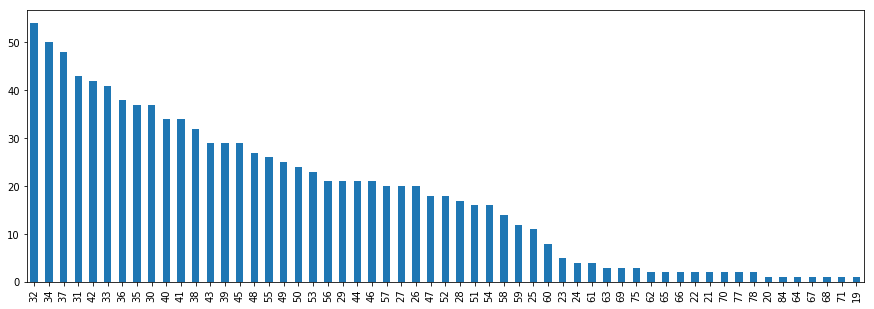

In [64]:
data['age'].value_counts().plot(kind='bar',figsize=(15,5))

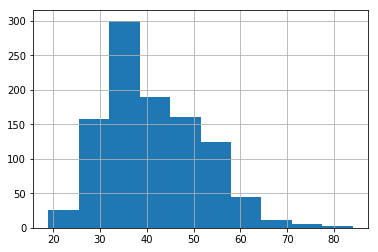

In [65]:
data['age'].hist()

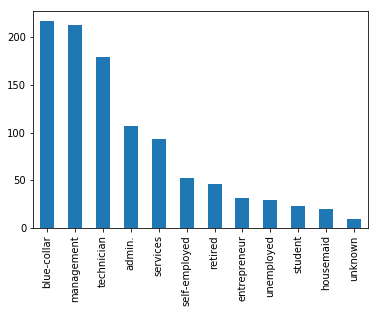

In [66]:
data['job'].value_counts().plot(kind='bar')

In [67]:
data[data['job']=='unknown']

,age,job,marital status,education,credit default,housing loan,personal loan,y
95,41,unknown,single,tertiary,no,no,no,no
178,37,unknown,married,unknown,no,no,no,no
230,52,unknown,married,secondary,no,no,no,no
574,55,unknown,married,primary,no,no,no,no
621,30,unknown,single,tertiary,no,no,no,no
625,49,unknown,married,secondary,no,no,no,no
673,71,unknown,married,tertiary,no,no,no,no
772,59,unknown,married,unknown,no,no,no,no
790,39,unknown,single,secondary,no,no,no,no
860,65,unknown,married,unknown,no,no,no,yes


In [68]:
data[data['job']=='unknown'].shape

(10, 8)

unknown value in job can be considered because it has 10 records

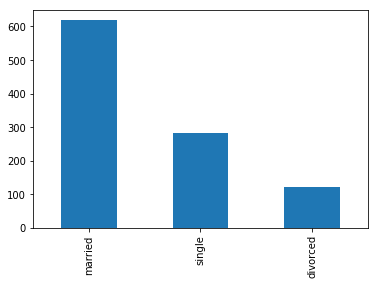

In [69]:
data['marital status'].value_counts().plot(kind='bar')

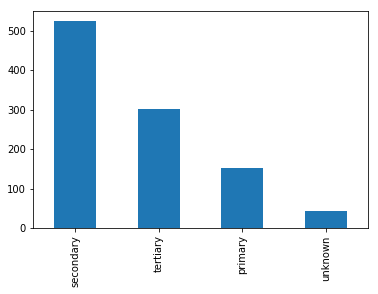

In [70]:
data['education'].value_counts().plot(kind='bar')

So unknown values is in acceptable range

In [71]:
data[data['education']=='unknown'].shape

(42, 8)

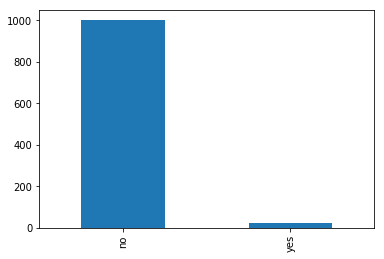

In [72]:
data['credit default'].value_counts().plot(kind='bar')

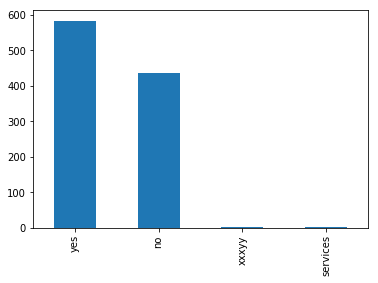

In [73]:
data['housing loan'].value_counts().plot(kind='bar')

Some junk values in the housing loan, need to be verified before replacing or removing the data

In [74]:
data[data['housing loan']=='xxxyy']

,age,job,marital status,education,credit default,housing loan,personal loan,y
800,59,management,married,tertiary,no,xxxyy,no,no


In [75]:
data.loc[(data['age']==59) &
         (data['job']=='management') &
         (data['marital status']=='married')&
         (data['education']=='tertiary') &
         (data['credit default']=='no') &
         (data['personal loan'] =='no') &
         (data['y']=='no')
        ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
800,59,management,married,tertiary,no,xxxyy,no,no


In [76]:
data.loc[(data['age'] >= 55) & (data['age'] <= 60) &
         (data['job']=='management') &
         (data['marital status']=='married')&
         (data['education']=='tertiary') &
         (data['credit default']=='no') &
         (data['personal loan'] =='no') &
         (data['housing loan'] !='xxxyy') &
         (data['y']=='no')
        ]['housing loan'].mode()

0    no
dtype: object

In [77]:
data.loc[(data['age'] >= 55) & (data['age'] <= 60) &
         (data['job']=='management') &
         (data['marital status']=='married')&
         (data['education']=='tertiary') &
         (data['credit default']=='no') &
         (data['personal loan'] =='no') &
         (data['housing loan'] =='xxxyy') &
         (data['y']=='no')
        ,'housing loan']= \
data.loc[(data['age'] >= 55) & (data['age'] <= 60) &
         (data['job']=='management') &
         (data['marital status']=='married')&
         (data['education']=='tertiary') &
         (data['credit default']=='no') &
         (data['personal loan'] =='no') &
         (data['housing loan'] !='xxxyy') &
         (data['y']=='no')
        ]['housing loan'].mode()[0]

In [78]:
data.loc[(data['age']==59) &
         (data['job']=='management') &
         (data['marital status']=='married')&
         (data['education']=='tertiary') &
         (data['credit default']=='no') &
         (data['personal loan'] =='no') &
         (data['y']=='no')
        ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
800,59,management,married,tertiary,no,no,no,no


In [79]:
data[data['housing loan']=='services']

,age,job,marital status,education,credit default,housing loan,personal loan,y
1016,33,services,married,secondary,no,services,no,no


In [80]:
data.loc[(data['age']==33) &
         (data['job']=='services') &
         (data['marital status']=='married')&
         (data['education']=='secondary') &
         (data['credit default']=='no') &
         (data['personal loan'] =='no') &
         (data['y']=='no')
        ]

,age,job,marital status,education,credit default,housing loan,personal loan,y
1007,33,services,married,secondary,no,yes,no,no
1016,33,services,married,secondary,no,services,no,no


In [81]:
data.loc[(data['age']==33) &
         (data['job']=='services') &
         (data['marital status']=='married')&
         (data['education']=='secondary') &
         (data['credit default']=='no') &
         (data['personal loan'] =='no') &
         (data['housing loan'] =='services') &
         (data['y']=='no')
        ,'housing loan'] = 'yes'

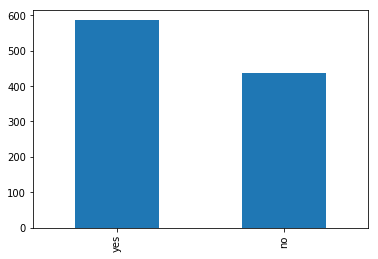

In [82]:
data['housing loan'].value_counts().plot(kind='bar')

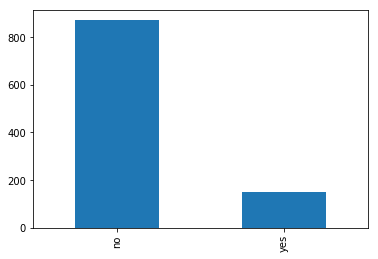

In [83]:
data['personal loan'].value_counts().plot(kind='bar')

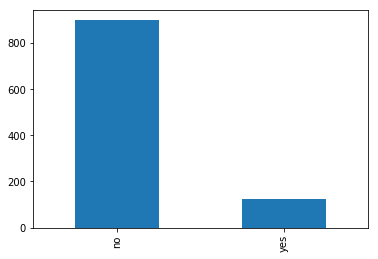

In [84]:
data['y'].value_counts().plot(kind='bar')

Visualization of the data to gain insights

Lets see the age group and other attributes based on which who are all interested in the term deposit

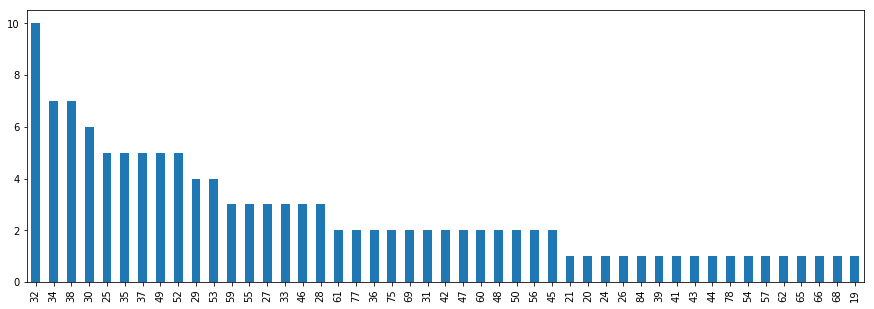

In [85]:
data[data['y']=='yes']['age'].value_counts().plot(kind='bar',figsize=(15,5))

In [86]:
data['age'].min(),data['age'].max()

(19, 84)

In [87]:
data['age_range']= pd.cut(x=data['age'],bins=[15,25,35,45,55,65,75,85])

In [88]:
data.head()

,age,job,marital status,education,credit default,housing loan,personal loan,y,age_range
0,30,unemployed,married,primary,no,no,no,no,"(25, 35]"
1,33,services,married,secondary,no,yes,yes,no,"(25, 35]"
2,35,management,single,tertiary,no,yes,no,no,"(25, 35]"
3,30,management,married,tertiary,no,yes,yes,no,"(25, 35]"
4,59,blue-collar,married,secondary,no,yes,no,no,"(55, 65]"


In [89]:
data['age_range']=data['age_range'].apply(lambda x: str(x.left)+'-'+str(x.right))

In [90]:
data.head()

,age,job,marital status,education,credit default,housing loan,personal loan,y,age_range
0,30,unemployed,married,primary,no,no,no,no,25-35
1,33,services,married,secondary,no,yes,yes,no,25-35
2,35,management,single,tertiary,no,yes,no,no,25-35
3,30,management,married,tertiary,no,yes,yes,no,25-35
4,59,blue-collar,married,secondary,no,yes,no,no,55-65


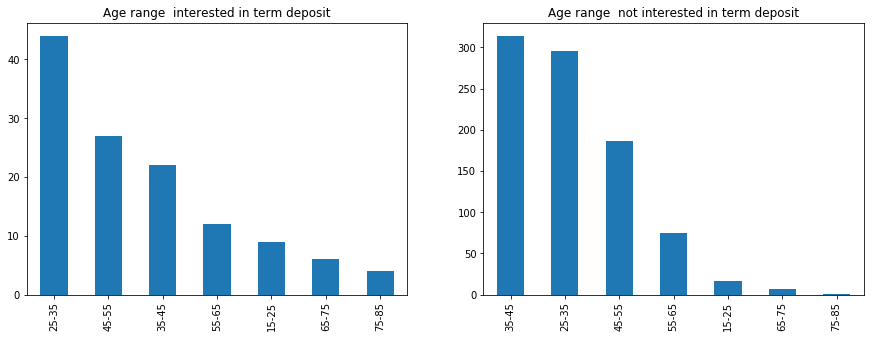

In [91]:
fig,ax= plt.subplots(1,2,figsize=(15,5))
data[data['y']=='yes']['age_range'].value_counts().plot(kind='bar',
                                                             title='Age range  interested in term deposit',
                                                             ax=ax[0])
data[data['y']=='no']['age_range'].value_counts().plot(kind='bar',title='Age range  not interested in term deposit',
                                                           ax=ax[1])

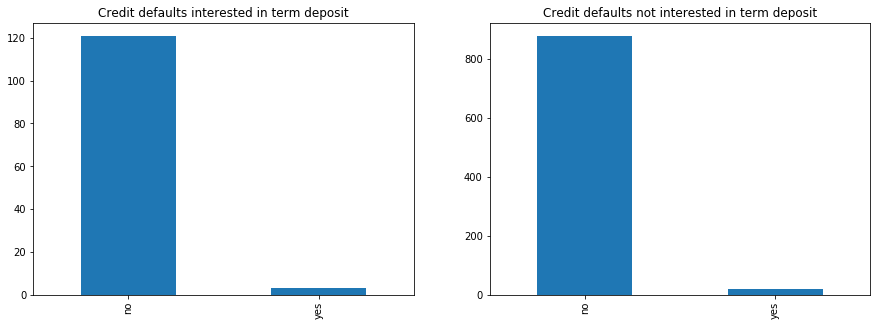

In [92]:
fig,ax= plt.subplots(1,2,figsize=(15,5))
data[data['y']=='yes']['credit default'].value_counts().plot(kind='bar',
                                                             title='Credit defaults interested in term deposit',
                                                             ax=ax[0])
data[data['y']=='no']['credit default'].value_counts().plot(kind='bar',title='Credit defaults not interested in term deposit',
                                                           ax=ax[1])

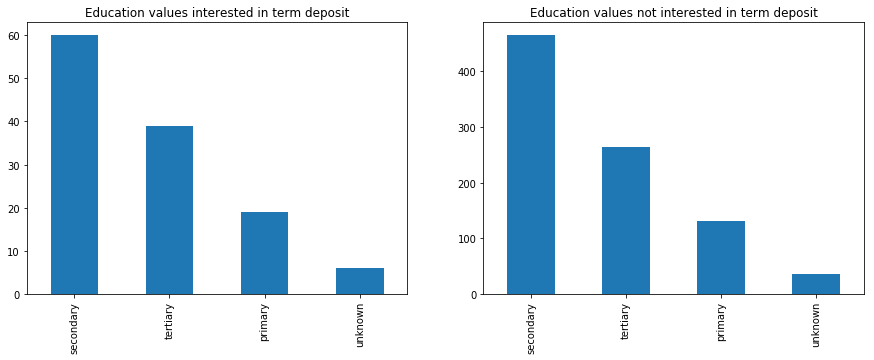

In [93]:
fig,ax= plt.subplots(1,2,figsize=(15,5))
data[data['y']=='yes']['education'].value_counts().plot(kind='bar',
                                                             title='Education values interested in term deposit',
                                                             ax=ax[0])
data[data['y']=='no']['education'].value_counts().plot(kind='bar',title='Education values not interested in term deposit',
                                                           ax=ax[1])

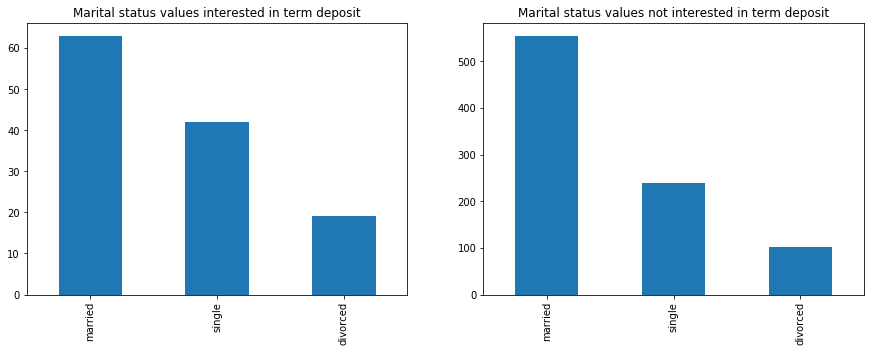

In [94]:
fig,ax= plt.subplots(1,2,figsize=(15,5))
data[data['y']=='yes']['marital status'].value_counts().plot(kind='bar',
                                                             title='Marital status values interested in term deposit',
                                                             ax=ax[0])
data[data['y']=='no']['marital status'].value_counts().plot(kind='bar',title='Marital status values not interested in term deposit',
                                                           ax=ax[1])

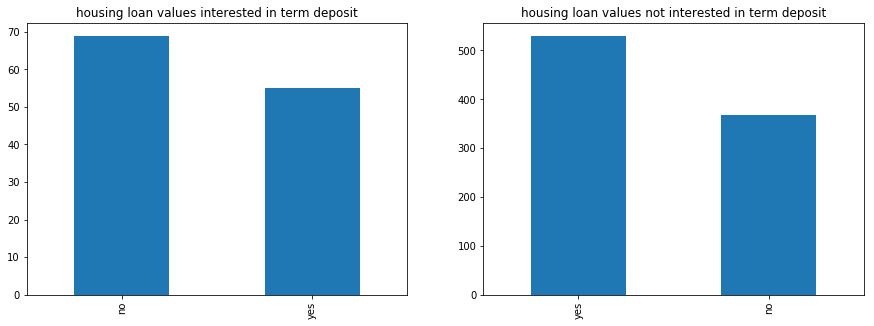

In [95]:
fig,ax= plt.subplots(1,2,figsize=(15,5))
data[data['y']=='yes']['housing loan'].value_counts().plot(kind='bar',
                                                             title='housing loan values interested in term deposit',
                                                             ax=ax[0])
data[data['y']=='no']['housing loan'].value_counts().plot(kind='bar',title='housing loan values not interested in term deposit',
                                                           ax=ax[1])

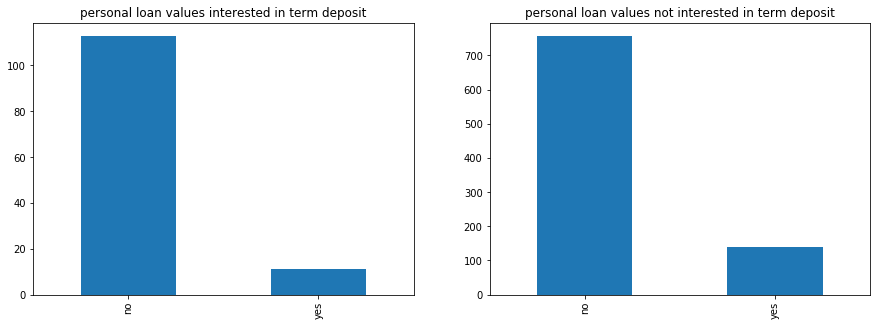

In [96]:
fig,ax= plt.subplots(1,2,figsize=(15,5))
data[data['y']=='yes']['personal loan'].value_counts().plot(kind='bar',
                                                             title='personal loan values interested in term deposit',
                                                             ax=ax[0])
data[data['y']=='no']['personal loan'].value_counts().plot(kind='bar',title='personal loan values not interested in term deposit',
                                                           ax=ax[1])

Above is the splitted representation and belowis the combined representation

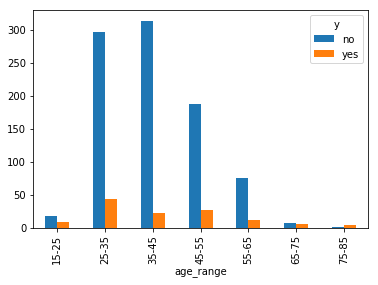

In [97]:
data.groupby(['age_range'])['y'].value_counts().unstack().plot(kind='bar')

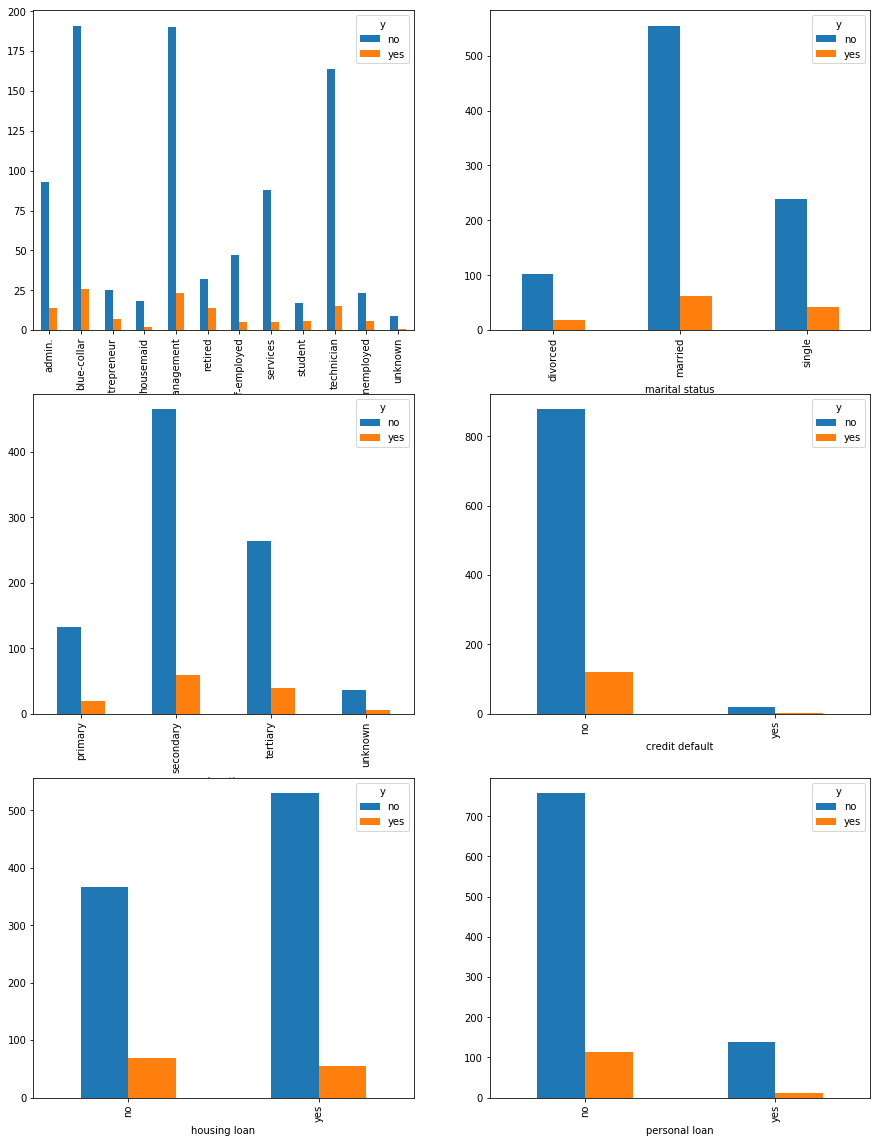

In [98]:
fig,ax= plt.subplots(3,2,figsize=(15,20))
data.groupby(['job'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[0,0])
data.groupby(['marital status'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[0,1])
data.groupby(['education'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[1,0])
data.groupby(['credit default'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[1,1])
data.groupby(['housing loan'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[2,0])
data.groupby(['personal loan'])['y'].value_counts().unstack().plot(kind='bar',ax=ax[2,1])

Analysis:

From the above we can clearly determine that people **interested** for **term deposit** are with age **25-55**,(management,bluecollor,technician) jobs,married,**(secondary,tertiary)** education, with **no credit default**,**no personal loan** and with respect to home loan it more or less same for both yes and no

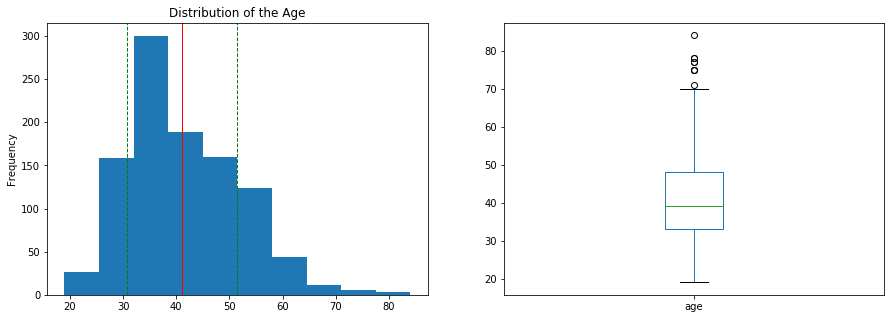

In [99]:
fig,(ax0,ax1) = plt.subplots(1,2, figsize=(15,5))
data['age'].plot(kind='hist',title='Distribution of the Age',ax=ax0)
mean_age = data['age'].mean()
std_age = data['age'].std()
ax0.axvline(data['age'].mean(),color='r',linestyle='solid',linewidth=1)
ax0.axvline(mean_age+std_age,color='g',linestyle='dashed',linewidth=1)
ax0.axvline(mean_age-std_age,color='g',linestyle='dashed',linewidth=1)

data['age'].plot(kind='box',ax=ax1)

**Modeling**

In [100]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

from pandas.plotting import scatter_matrix

In [101]:
le =LabelEncoder()

In [102]:
data['job_value']=le.fit_transform(data['job'])

In [103]:
data['maritalstatus_value']=le.fit_transform(data['marital status'])

In [104]:
data['education_value']=le.fit_transform(data['education'])

In [105]:
data['housingloan_value']=le.fit_transform(data['housing loan'])

In [106]:
data['personalloan_value']=le.fit_transform(data['personal loan'])

In [107]:
data['term_deposit']=le.fit_transform(data['y'])

In [108]:
data.head()

,age,job,marital status,education,credit default,housing loan,personal loan,y,age_range,job_value,maritalstatus_value,education_value,housingloan_value,personalloan_value,term_deposit
0,30,unemployed,married,primary,no,no,no,no,25-35,10,1,0,0,0,0
1,33,services,married,secondary,no,yes,yes,no,25-35,7,1,1,1,1,0
2,35,management,single,tertiary,no,yes,no,no,25-35,4,2,2,1,0,0
3,30,management,married,tertiary,no,yes,yes,no,25-35,4,1,2,1,1,0
4,59,blue-collar,married,secondary,no,yes,no,no,55-65,1,1,1,1,0,0


In [109]:
data.columns

Index(['age', 'job', 'marital status', 'education', 'credit default',
       'housing loan', 'personal loan', 'y', 'age_range', 'job_value',
       'maritalstatus_value', 'education_value', 'housingloan_value',
       'personalloan_value', 'term_deposit'],
      dtype='object')

In [110]:
X=data[['age','job_value','maritalstatus_value', 'education_value', 'housingloan_value','personalloan_value']]
y=data['term_deposit']

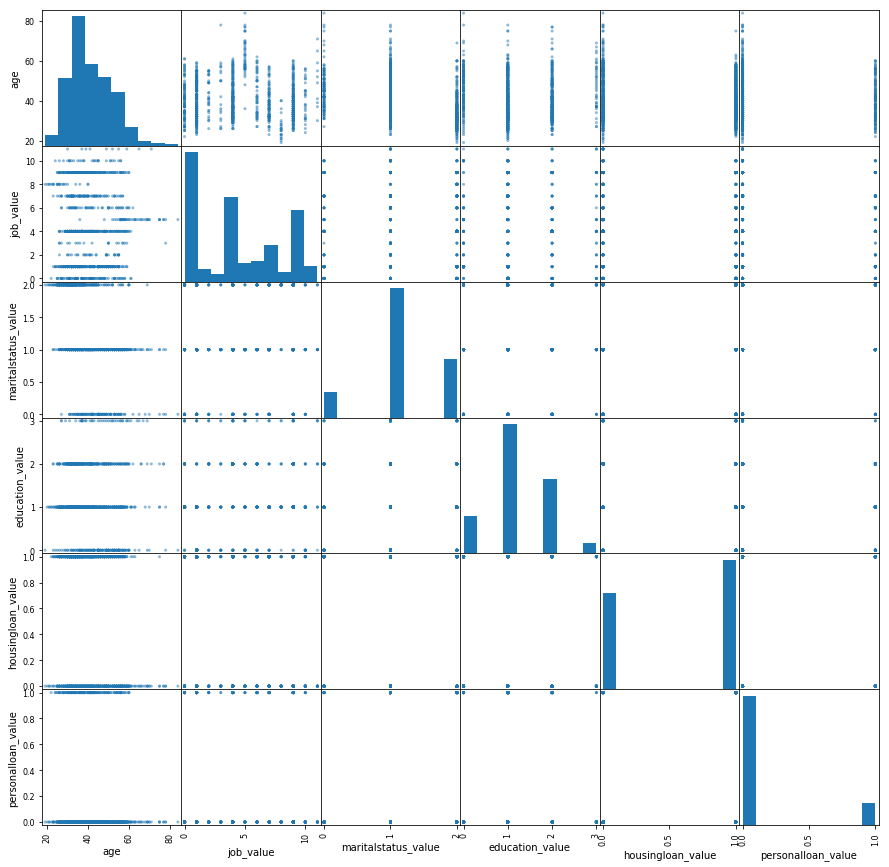

In [111]:
p=scatter_matrix(X,figsize=(15, 15))

Correlation  Analysis -Pearson

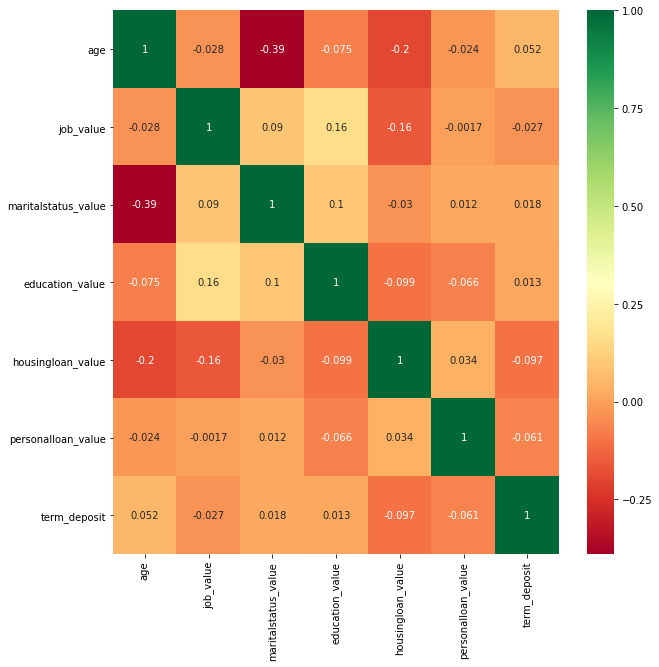

In [112]:
plt.figure(figsize=(10,10)) 
sns.heatmap(data[['age','job_value','maritalstatus_value', 
                  'education_value', 'housingloan_value','personalloan_value', 'term_deposit']].corr(),
            annot=True,cmap ='RdYlGn')

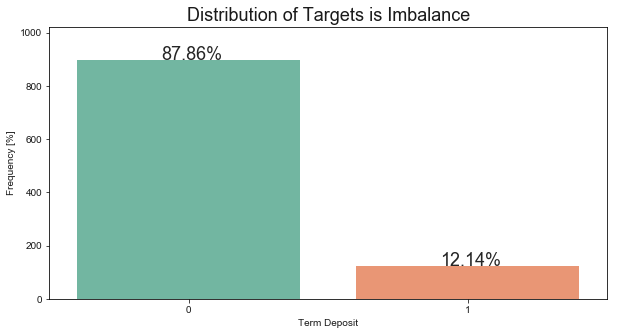

In [113]:
ax = sns.countplot(x = y ,palette="Set2")
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=1021)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(y)), (p.get_x()+ 0.3, p.get_height()))

plt.title('Distribution of Targets is Imbalance')
plt.xlabel('Term Deposit')
plt.ylabel('Frequency [%]')
plt.show()

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score,train_test_split

from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

import warnings
warnings.filterwarnings('ignore') 
random_state=2019

In [115]:
X=X.values
y=y.values

In [116]:

param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [None,2,4,8,10],
              'max_features': [2,4,6],
              'random_state':[random_state]
             }

i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X[train_index],X[test_index]
  ytr,yvl = y[train_index],y[test_index]
  model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring= 'f1',iid=True)
  model.fit(xtr, ytr)
  print (model.best_params_)
  pred=model.predict(xvl)
  print('accuracy_score',accuracy_score(yvl,pred))
  i+=1


1 of kfold 5
{'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'random_state': 2019, 'splitter': 'best'}
accuracy_score 0.8097560975609757

2 of kfold 5
{'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'random_state': 2019, 'splitter': 'best'}
accuracy_score 0.8097560975609757

3 of kfold 5
{'criterion': 'entropy', 'max_depth': None, 'max_features': 4, 'random_state': 2019, 'splitter': 'best'}
accuracy_score 0.7990196078431373

4 of kfold 5
{'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'random_state': 2019, 'splitter': 'random'}
accuracy_score 0.803921568627451

5 of kfold 5
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'random_state': 2019, 'splitter': 'best'}
accuracy_score 0.8620689655172413


In [117]:
indexes=[]
kf = StratifiedKFold(n_splits = 5, random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  indexes.append({'train':train_index,'test':test_index})

In [118]:
#Best Param - Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth= 10, max_features= 2, random_state= 2019, splitter='best')
model.fit(X[indexes[0]['train']],y[indexes[1]['train']])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=2019, splitter='best')

In [119]:
#train and test spliting, train and test data size is 80 and 20 percentage respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2019)

In [120]:
def fit_evaluate(X_test,y_test):
  y_pred = model.predict(X_test)
  
  cnf_matrix = confusion_matrix(y_test,y_pred)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  
  print(classification_report(y_test,y_pred))
  
  y_pred_proba = model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='DTC')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title('DTC ROC curve')
  plt.show()
  
  print('ROC AUC Score')
  print(roc_auc_score(y_test,y_pred_proba))
    
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))

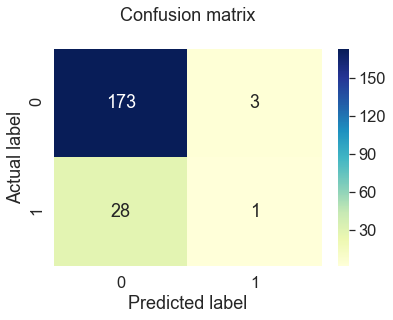

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       176
           1       0.25      0.03      0.06        29

   micro avg       0.85      0.85      0.85       205
   macro avg       0.56      0.51      0.49       205
weighted avg       0.77      0.85      0.80       205



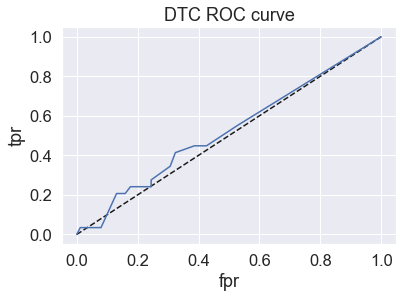

ROC AUC Score
0.5225313479623825
Accuracy: 84.88%


In [121]:
fit_evaluate(X_test,y_test)